<a href="https://colab.research.google.com/github/priyagijain/projects/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/Colab Notebooks/ML PRACTICAL/algos/

/content/gdrive/My Drive/Colab Notebooks/ML PRACTICAL/algos


In [4]:
df = pd.read_excel('airdata.xlsx')
df

,WHO_Region,ISO3,Country_Name,City,Measurement_Year,PM2.5,PM10,NO2,PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,African Region,ZAF,South Africa,West Coast,2015,7.47,24.64,7.64,75.0,75.0,75.000000,South African Air Quality Information System,3 Residential-Medium/Upper income,2022,NaN
32187,African Region,ZAF,South Africa,West Coast,2016,8.42,33.28,7.27,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN
32188,African Region,ZAF,South Africa,West Coast,2017,6.83,20.49,8.72,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN
32189,African Region,ZAF,South Africa,West Coast,2018,6.10,17.99,7.15,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN


In [5]:
#EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   WHO_Region                              32190 non-null  object 
 1   ISO3                                    32191 non-null  object 
 2   Country_Name                            32191 non-null  object 
 3   City                                    32191 non-null  object 
 4   Measurement_Year                        32191 non-null  int64  
 5   PM2.5                                   15048 non-null  float64
 6   PM10                                    21109 non-null  float64
 7   NO2                                     22200 non-null  float64
 8   PM25 temporal coverage (%)              7275 non-null   float64
 9   PM10 temporal coverage (%)              5381 non-null   float64
 10  NO2 temporal coverage (%)               19890 non-null  fl

In [7]:
nullvalues = df.isnull().sum()
nullvalues

WHO_Region                                    1
ISO3                                          0
Country_Name                                  0
City                                          0
Measurement_Year                              0
PM2.5                                     17143
PM10                                      11082
NO2                                        9991
PM25 temporal coverage (%)                24916
PM10 temporal coverage (%)                26810
NO2 temporal coverage (%)                 12301
Reference                                     5
Number and type of monitoring stations    23433
Version of the database                       0
Status                                    32191
dtype: int64

In [8]:
df.describe()

,Measurement_Year,PM2.5,PM10,NO2,PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Version of the database,Status
count,32191.000000,15048.000000,21109.000000,22200.000000,7275.000000,5381.000000,19890.000000,32191.000000,0.0
mean,2015.579354,22.920320,30.533252,20.619336,90.794096,90.583500,93.696804,2021.744214,NaN
std,2.752654,17.925906,29.312756,12.133388,14.872681,13.816311,10.451751,1.051897,NaN
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000,NaN
25%,2014.000000,10.350000,16.980000,12.000000,88.595890,87.945205,93.207763,2022.000000,NaN
50%,2016.000000,16.000000,22.000000,18.800000,97.000000,96.039000,96.369863,2022.000000,NaN
75%,2018.000000,31.000000,31.300000,27.160000,99.000000,98.938000,98.926941,2022.000000,NaN
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000,NaN


In [9]:
df.nunique()

WHO_Region                                   6
ISO3                                       118
Country_Name                               118
City                                      6874
Measurement_Year                            21
PM2.5                                     4749
PM10                                      5081
NO2                                       4633
PM25 temporal coverage (%)                2307
PM10 temporal coverage (%)                2084
NO2 temporal coverage (%)                 6496
Reference                                  251
Number and type of monitoring stations     634
Version of the database                      3
Status                                       0
dtype: int64

In [11]:
df['WHO_Region'].value_counts()

European Region                 20292
Western Pacific Region           4798
Region of the Americas           3957
South East Asia Region           2514
Eastern Mediterranean Region      438
African Region                    191
Name: WHO_Region, dtype: int64

<Axes: xlabel='WHO_Region', ylabel='count'>

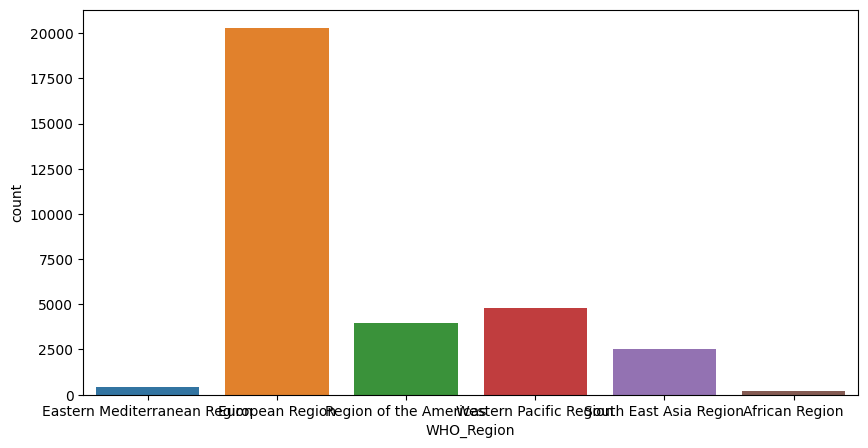

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='WHO_Region', data=df)

In [13]:
df['Country_Name'].value_counts()

China                               3967
Italy                               3129
Germany                             2601
Spain                               2497
India                               2265
                                    ... 
Nigeria                                1
Kyrgyzstan                             1
Maldives                               1
Lao People's Democratic Republic       1
Afghanistan                            1
Name: Country_Name, Length: 118, dtype: int64

[]

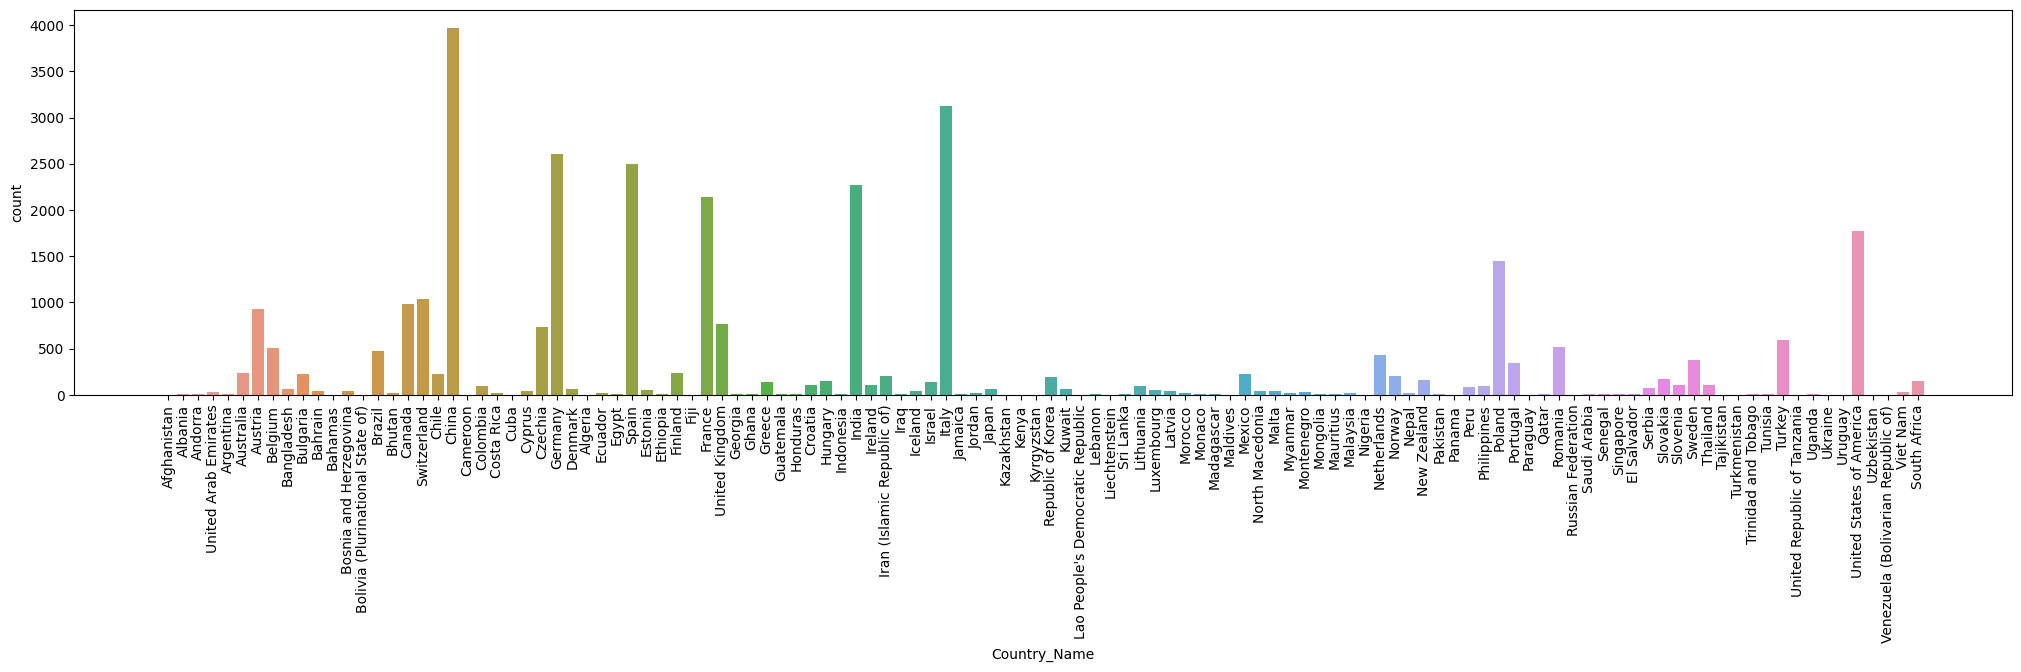

In [14]:
plt.figure(figsize=(25, 5))
sns.countplot(x='Country_Name', data=df)
plt.xticks(rotation=90)
plt.plot()
# China has appeared most number of times in the data followed by Italy, Germany, Spain, India, France, USA and Poland.

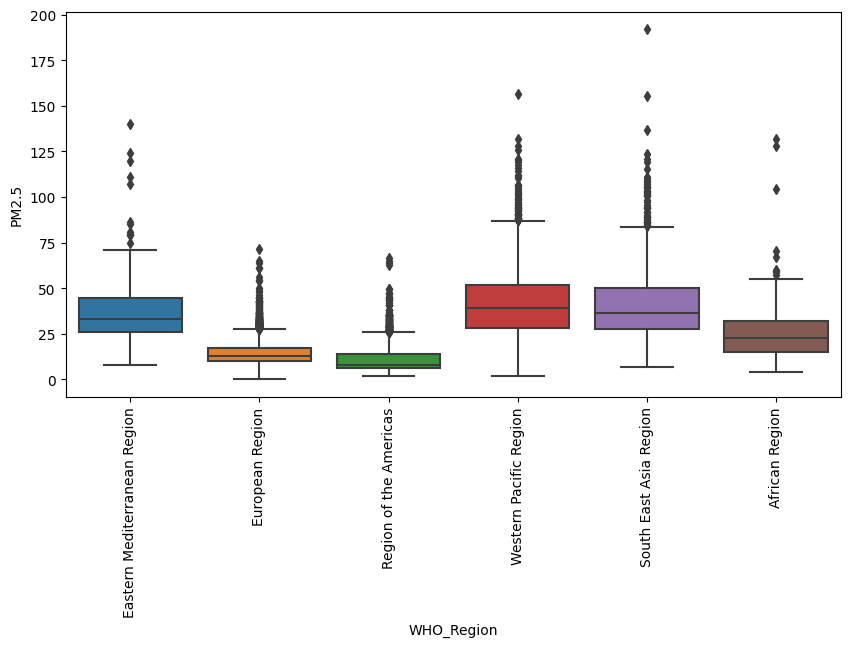

In [15]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.boxplot(x='WHO_Region',y='PM2.5',data=df);
# South East Asia Region has higher pm2_5 level compared to other Regions

In [16]:
#Handlling missing or null values
#Counting the percentage of null values.
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [17]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
WHO_Region,1,0.003106
ISO3,0,0.000000
Country_Name,0,0.000000
City,0,0.000000
Measurement_Year,0,0.000000
PM2.5,17143,53.254015
PM10,11082,34.425771
NO2,9991,31.036625
PM25 temporal coverage (%),24916,77.400516
PM10 temporal coverage (%),26810,83.284148


In [18]:
# Remaining columns with null values
df.isnull().sum()

WHO_Region                                    1
ISO3                                          0
Country_Name                                  0
City                                          0
Measurement_Year                              0
PM2.5                                     17143
PM10                                      11082
NO2                                        9991
PM25 temporal coverage (%)                24916
PM10 temporal coverage (%)                26810
NO2 temporal coverage (%)                 12301
Reference                                     5
Number and type of monitoring stations    23433
Version of the database                       0
Status                                    32191
dtype: int64

In [19]:
df

,WHO_Region,ISO3,Country_Name,City,Measurement_Year,PM2.5,PM10,NO2,PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,African Region,ZAF,South Africa,West Coast,2015,7.47,24.64,7.64,75.0,75.0,75.000000,South African Air Quality Information System,3 Residential-Medium/Upper income,2022,NaN
32187,African Region,ZAF,South Africa,West Coast,2016,8.42,33.28,7.27,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN
32188,African Region,ZAF,South Africa,West Coast,2017,6.83,20.49,8.72,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN
32189,African Region,ZAF,South Africa,West Coast,2018,6.10,17.99,7.15,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,NaN


In [20]:
# Null value Imputation for categorical data
df['WHO_Region']=df['WHO_Region'].fillna(df['WHO_Region'].mode()[0])
df['Number and type of monitoring stations']=df['Number and type of monitoring stations'].fillna(df[
                                                'Number and type of monitoring stations'].mode()[0])

In [21]:
# null values are replaced with zeros for the numerical data
df.fillna(0, inplace=True)
df.isnull().sum()

WHO_Region                                0
ISO3                                      0
Country_Name                              0
City                                      0
Measurement_Year                          0
PM2.5                                     0
PM10                                      0
NO2                                       0
PM25 temporal coverage (%)                0
PM10 temporal coverage (%)                0
NO2 temporal coverage (%)                 0
Reference                                 0
Number and type of monitoring stations    0
Version of the database                   0
Status                                    0
dtype: int64

In [22]:
df

,WHO_Region,ISO3,Country_Name,City,Measurement_Year,PM2.5,PM10,NO2,PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,0.00,0.00,18.0,0.0,0.000000,"U.S. Department of State, United States Enviro...",1 NA,2022,0.0
1,European Region,ALB,Albania,Durres,2015,0.00,17.65,26.63,0.0,0.0,83.961187,European Environment Agency (downloaded in 2021),1 NA,2022,0.0
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,0.0,0.0,87.932605,European Environment Agency (downloaded in 2021),1 NA,2022,0.0
3,European Region,ALB,Albania,Elbasan,2015,0.00,0.00,23.96,0.0,0.0,97.853881,European Environment Agency (downloaded in 2021),1 NA,2022,0.0
4,European Region,ALB,Albania,Elbasan,2016,0.00,0.00,26.26,0.0,0.0,96.049636,European Environment Agency (downloaded in 2021),1 NA,2022,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,African Region,ZAF,South Africa,West Coast,2015,7.47,24.64,7.64,75.0,75.0,75.000000,South African Air Quality Information System,3 Residential-Medium/Upper income,2022,0.0
32187,African Region,ZAF,South Africa,West Coast,2016,8.42,33.28,7.27,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,0.0
32188,African Region,ZAF,South Africa,West Coast,2017,6.83,20.49,8.72,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,0.0
32189,African Region,ZAF,South Africa,West Coast,2018,6.10,17.99,7.15,75.0,75.0,75.000000,South African Air Quality Information System,2 Residential-Medium/Upper income,2022,0.0


In [23]:
#Data Cleaning
# Dropping unnecessary columns
df.drop(['ISO3'],axis=1,inplace=True)
df.drop(['Measurement_Year'],axis=1,inplace=True)
df.drop(['PM25 temporal coverage (%)'],axis=1,inplace=True)
df.drop(['PM10 temporal coverage (%)'],axis=1,inplace=True)
df.drop(['NO2 temporal coverage (%)'],axis=1,inplace=True)
df.drop(['Reference'],axis=1,inplace=True)
df.drop(['Version of the database'],axis=1,inplace=True)
df.drop(['Status'],axis=1,inplace=True)
df.drop(['Number and type of monitoring stations'],axis=1,inplace=True)

In [24]:
#Function to calculate AQI based on PM2.5 value
def cal_PM25_aqi(pm25):
    PM25_aqi = 0.00
    if(pm25 <= 12.00):
        PM25_aqi = 25
    elif(pm25 > 12.00 and pm25 <= 35.40):
        PM25_aqi = 75
    elif(pm25 > 35.40 and pm25 <= 55.40):
        PM25_aqi = 125
    elif(pm25 > 55.3 and pm25 <= 150.4):
        PM25_aqi = 175
    elif(pm25 > 150.4 and pm25 <= 250.4):
        PM25_aqi = 250
    else:
        PM25_aqi = 400
    return PM25_aqi

df['PM25_AQI'] = df['PM2.5'].apply(cal_PM25_aqi)
data = df[['PM2.5','PM25_AQI']]
data.head()

,PM2.5,PM25_AQI
0,119.77,175
1,0.00,25
2,14.32,75
3,0.00,25
4,0.00,25


In [25]:
#Function to calculate AQI based on PM10 value
def cal_PM10_aqi(pm10):
    PM10_aqi = 0
    if(pm10 <= 54):
        PM10_aqi = 25
    elif(pm10 > 54 and pm10 <= 154):
        PM10_aqi = 75
    elif(pm10 > 154 and pm10 <= 254):
        PM10_aqi = 125
    elif(pm10 > 254 and pm10 <= 354):
        PM10_aqi = 175
    elif(pm10 > 354 and pm10 <= 424):
        PM10_aqi = 250
    else:
        PM10_aqi = 400
    return PM10_aqi

df['PM10_AQI'] = df['PM10 '].apply(cal_PM10_aqi)
data = df[['PM10 ','PM10_AQI']]
data.head()

,PM10,PM10_AQI
0,0.00,25
1,17.65,25
2,24.56,25
3,0.00,25
4,0.00,25


In [26]:
#Function to calculate AQI based on NO2 value
def cal_NO2_aqi(NO2):
    NO2_aqi = 0
    if(NO2 <= 53):
        NO2_aqi = 25
    elif(NO2 > 53 and NO2 <= 100):
        NO2_aqi = 75
    elif(NO2 > 100 and NO2 <= 360):
        NO2_aqi = 125
    elif(NO2 > 360 and NO2 <= 649):
        NO2_aqi = 175
    elif(NO2 > 649 and NO2 <= 1249):
        NO2_aqi = 250
    else:
        NO2_aqi = 400
    return NO2_aqi

df['NO2_AQI'] = df['NO2'].apply(cal_NO2_aqi)
data = df[['NO2','NO2_AQI']]
data.head()

,NO2,NO2_AQI
0,0.00,25
1,26.63,25
2,24.78,25
3,23.96,25
4,26.26,25


In [27]:
df

,WHO_Region,Country_Name,City,PM2.5,PM10,NO2,PM25_AQI,PM10_AQI,NO2_AQI
0,Eastern Mediterranean Region,Afghanistan,Kabul,119.77,0.00,0.00,175,25,25
1,European Region,Albania,Durres,0.00,17.65,26.63,25,25,25
2,European Region,Albania,Durres,14.32,24.56,24.78,75,25,25
3,European Region,Albania,Elbasan,0.00,0.00,23.96,25,25,25
4,European Region,Albania,Elbasan,0.00,0.00,26.26,25,25,25
...,...,...,...,...,...,...,...,...,...
32186,African Region,South Africa,West Coast,7.47,24.64,7.64,25,25,25
32187,African Region,South Africa,West Coast,8.42,33.28,7.27,25,25,25
32188,African Region,South Africa,West Coast,6.83,20.49,8.72,25,25,25
32189,African Region,South Africa,West Coast,6.10,17.99,7.15,25,25,25


In [28]:
# Calculate the final air quality index (finalAQI) of every data value by taking the average of 'PM25_AQI','PM10_AQI','NO2_AQI'.
df['finalAQI'] = round(df[['PM25_AQI','PM10_AQI','NO2_AQI']].mean(axis=1), 2)
df.head()

,WHO_Region,Country_Name,City,PM2.5,PM10,NO2,PM25_AQI,PM10_AQI,NO2_AQI,finalAQI
0,Eastern Mediterranean Region,Afghanistan,Kabul,119.77,0.00,0.00,175,25,25,75.00
1,European Region,Albania,Durres,0.00,17.65,26.63,25,25,25,25.00
2,European Region,Albania,Durres,14.32,24.56,24.78,75,25,25,41.67
3,European Region,Albania,Elbasan,0.00,0.00,23.96,25,25,25,25.00
4,European Region,Albania,Elbasan,0.00,0.00,26.26,25,25,25,25.00


In [29]:
# Using threshold values to classify a particular values as good, moderate, unhealthy, very unhealthy and Hazardous
def AQI_Range(x):
    if x<=50:
        return "GOOD"
    elif x>50 and x<=100:
        return "MODERATE"
    elif x>100 and x<=200:
        return "UNHEALTHY"
    elif x>200 and x<=300:
        return "VERY UNHEALTHY"
    elif x>300:
        return "HAZARDOUS"

df['AQI_Range'] = df['finalAQI'] .apply(AQI_Range)
df.head()

,WHO_Region,Country_Name,City,PM2.5,PM10,NO2,PM25_AQI,PM10_AQI,NO2_AQI,finalAQI,AQI_Range
0,Eastern Mediterranean Region,Afghanistan,Kabul,119.77,0.00,0.00,175,25,25,75.00,MODERATE
1,European Region,Albania,Durres,0.00,17.65,26.63,25,25,25,25.00,GOOD
2,European Region,Albania,Durres,14.32,24.56,24.78,75,25,25,41.67,GOOD
3,European Region,Albania,Elbasan,0.00,0.00,23.96,25,25,25,25.00,GOOD
4,European Region,Albania,Elbasan,0.00,0.00,26.26,25,25,25,25.00,GOOD


In [30]:
# These are the counts of values present in the AQI_Range column.
df['AQI_Range'].value_counts()

GOOD         28410
MODERATE      3707
UNHEALTHY       74
Name: AQI_Range, dtype: int64

In [31]:
#Feature Selection
# we only select columns like PM2.5, PM10, NO2, finalAQI
feature = df[['PM2.5','PM10 ','NO2','finalAQI']]
feature.head()

,PM2.5,PM10,NO2,finalAQI
0,119.77,0.00,0.00,75.00
1,0.00,17.65,26.63,25.00
2,14.32,24.56,24.78,41.67
3,0.00,0.00,23.96,25.00
4,0.00,0.00,26.26,25.00


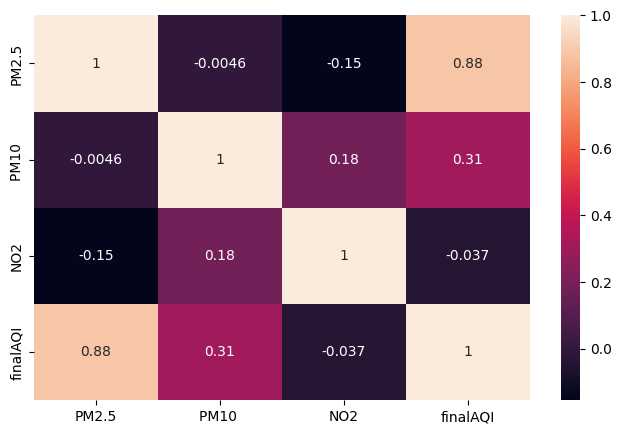

In [32]:
# Correlation of selected features
plt.figure(figsize=(8,5))
sns.heatmap(feature.corr(), annot=True);

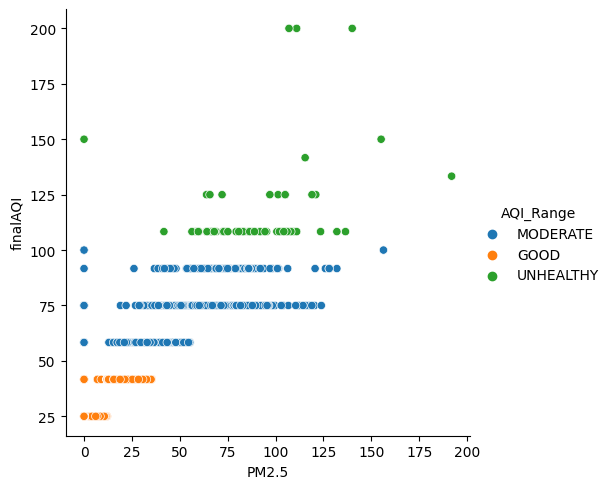

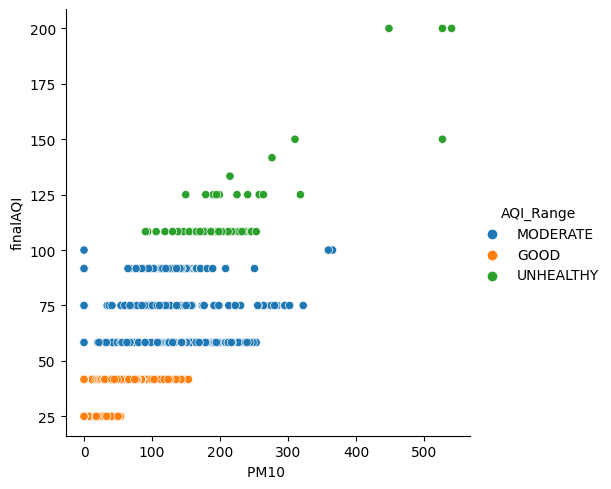

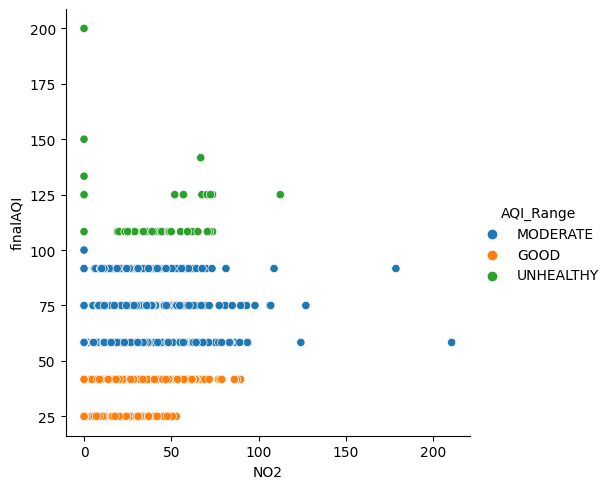

In [33]:
for i in df[['PM2.5','PM10 ','NO2']]:
    sns.relplot(data = df, x=i , y = df['finalAQI'], hue = df['AQI_Range'])

In [34]:
#Modelssss

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
X= df[['PM2.5','PM10 ','NO2']]
Y= df['finalAQI']
X.head()

,PM2.5,PM10,NO2
0,119.77,0.00,0.00
1,0.00,17.65,26.63
2,14.32,24.56,24.78
3,0.00,0.00,23.96
4,0.00,0.00,26.26


In [37]:
Y.head()

0    75.00
1    25.00
2    41.67
3    25.00
4    25.00
Name: finalAQI, dtype: float64

In [38]:
#Training and Testing Data

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(25752, 3) (6439, 3) (25752,) (6439,)


In [40]:
#LINEAR REGRESSION

In [41]:
# Model Fitting
model=LinearRegression()
lin_reg = model.fit(X_train,Y_train)
print(lin_reg)

LinearRegression()


In [42]:
# evaluating its performance on the testing data
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",RMSE_train)
print("RMSE TestData = ",RMSE_test)

RMSE TrainingData =  4.859796975963679
RMSE TestData =  4.91550976020729


In [43]:
score = lin_reg.score(X_test, Y_test)
lr_score = np.mean(score)
print('Accuracy : %.3f' % (lr_score))
print('Accuracy percentage : ' + " {:.2f}%".format(np.mean(score) * 100))

Accuracy : 0.882
Accuracy percentage :  88.18%


In [45]:
# predicting based on new data values
new_data1 = np.array([[19.16573, 18.79371, 0.634794]])
predicted = lin_reg.predict(new_data1)
print("The predicted value of Air Quality Index is", predicted)
print("aIR qUALITY:", AQI_Range(predicted))

The predicted value of Air Quality Index is [39.2496213]
aIR qUALITY: GOOD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
#Decision Tree Regressor
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [47]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [48]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  1.8399487804924273e-12
RMSE TestData =  0.5593304213674667
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9984696508615276


In [50]:
score = DT.score(X_test, Y_test)
dt_score = np.mean(score)
print('Accuracy : %.3f' % (dt_score))
print('Accuracy percentage : ' + " {:.2f}%".format(np.mean(score) * 100))

Accuracy : 0.998
Accuracy percentage :  99.85%


In [51]:
# predicting based on new data values
new_data1 = np.array([[19.16573, 18.79371, 0.634794]])
predicted = DT.predict(new_data1)
print("The predicted value of Air Quality Index is", predicted)
print("AIR QUALITYY:", AQI_Range(predicted))

The predicted value of Air Quality Index is [41.67]
AIR QUALITYY: GOOD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [52]:
#Random Forest
RF=RandomForestRegressor().fit(X_train,Y_train)
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [53]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.2447375414429088
RMSE TestData =  0.5575627432582466
--------------------------------------------------
RSquared value on train: 0.999696125679096
RSquared value on test: 0.9984793084447346


In [54]:
score = RF.score(X_test, Y_test)
rf_score = np.mean(score)
print('Accuracy : %.3f' % (rf_score))
print('Accuracy percentage : ' + " {:.2f}%".format(np.mean(score) * 100))

Accuracy : 0.998
Accuracy percentage :  99.85%


In [57]:
# predicting based on new data values
new_data1 = np.array([[19.16573, 18.79371, 0.634794]])
predicted = RF.predict(new_data1)
print("The predicted value of Air Quality Index is", predicted)
print("AIR QUALITYYYY:", AQI_Range(predicted))

The predicted value of Air Quality Index is [41.67]
AIR QUALITYYYY: GOOD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [59]:
# Splitting the data into independent and dependent columns for classification
X2 = df[['PM2.5','PM10 ','NO2']]
Y2 = df['AQI_Range']

In [60]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data

In [61]:
#LOGISTIC REGRESSION

In [62]:
#fit the model on train data
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)

#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

Model accuracy on train is:  0.9805721704455882
Model accuracy on test is:  0.9806099397590361
--------------------------------------------------


In [63]:
print(classification_report(Y_test2, test_preds2))

              precision    recall  f1-score   support

        GOOD       0.99      0.99      0.99      9351
    MODERATE       0.93      0.90      0.92      1255
   UNHEALTHY       0.75      0.83      0.79        18

    accuracy                           0.98     10624
   macro avg       0.89      0.91      0.90     10624
weighted avg       0.98      0.98      0.98     10624



In [64]:
log_reg.predict([[19.16573, 18.79371, 0.634794]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['GOOD'], dtype=object)

In [65]:
log_reg.predict([[119.16573, 187.79371, 94.39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['UNHEALTHY'], dtype=object)

In [66]:
#Decision Tree

In [67]:
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9996234939759037
--------------------------------------------------


In [68]:
print(classification_report(Y_test2, test_preds3))

              precision    recall  f1-score   support

        GOOD       1.00      1.00      1.00      9351
    MODERATE       1.00      1.00      1.00      1255
   UNHEALTHY       0.90      1.00      0.95        18

    accuracy                           1.00     10624
   macro avg       0.97      1.00      0.98     10624
weighted avg       1.00      1.00      1.00     10624



In [69]:
DT2.predict([[19.16573, 18.79371, 0.634794]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['GOOD'], dtype=object)

In [70]:
DT2.predict([[119.16573, 187.79371, 94.39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['UNHEALTHY'], dtype=object)

In [71]:
#K-Nearest Neighbours

In [72]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

Model accuracy on train is:  0.998284416005935
Model accuracy on test is:  0.997082078313253
--------------------------------------------------


In [73]:
print(classification_report(Y_test2, test_preds5))

              precision    recall  f1-score   support

        GOOD       1.00      1.00      1.00      9351
    MODERATE       0.99      0.98      0.99      1255
   UNHEALTHY       0.90      1.00      0.95        18

    accuracy                           1.00     10624
   macro avg       0.96      0.99      0.98     10624
weighted avg       1.00      1.00      1.00     10624



In [74]:
KNN.predict([[47.7,78.182,100]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['MODERATE'], dtype=object)

In [75]:
KNN.predict([[178.182,100,196]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['UNHEALTHY'], dtype=object)

In [76]:
#lINEAR REGRESSION: 0.882
#Decision Tree Regressor: 0.998
#Random Forest Regressor: 0.998
#Logistic Regression: 0.98
#Decision Tree ClassifieR: 0.999
#K-Nearest Neighbour: 1.00